### 1.读取运营商和通讯录数据 2.处理异常值 3观察数据分布

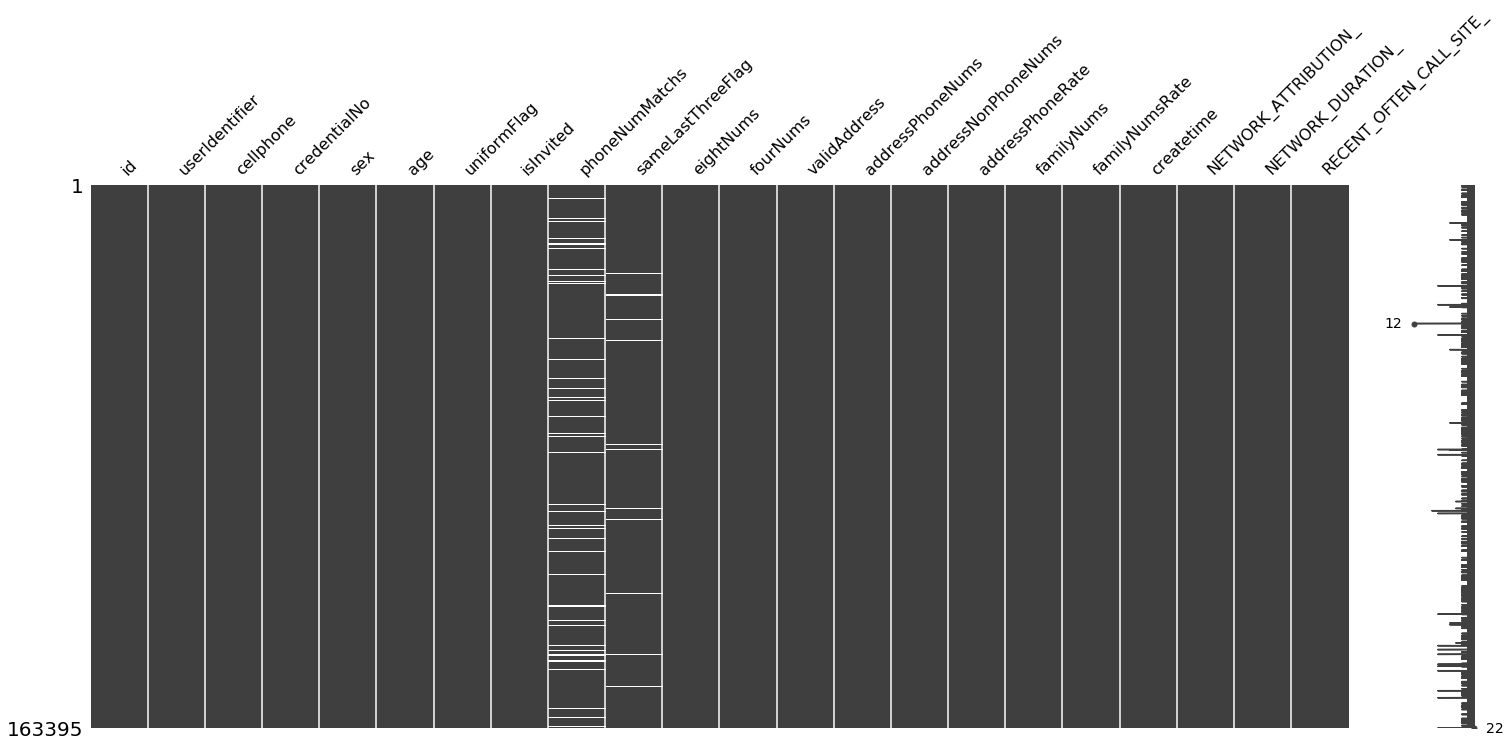

In [1]:
import pandas as pd
import missingno as missingno
import matplotlib.pyplot as plt
operator_data=pd.read_csv("/Users/abeltowne/Desktop/dataAndCoding/data1/Data/operator_data.csv",sep=",",encoding="gbk")
extention=pd.read_csv("/Users/abeltowne/Desktop/dataAndCoding/data1/Data/user_extention.csv",sep=",",encoding="gbk")
extention["uniformFlag"]=extention["uniformFlag"].fillna(0)
extention["isInvited"]=extention["isInvited"].fillna(0)
extention=extention.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12,25,26,27,28,29,30,31,33,34,35]]
operator_data.count()
missingno.matrix(extention)
plt.show()

### 变量衍生 生成主要时间点和平均话费

In [2]:
#生成衍生变量first_leadhour为生成借款时间点；avg_zhujiao_money为话费/主叫时长
from datetime import datetime
operator_data["first_leadhour"]=operator_data["first_leadtime"].map(lambda x:datetime.strptime(x,"%Y/%m/%d %H:%M").hour)
operator_data["avg_zhujiao_money"]=0
operator_data["avg_zhujiao_money"]=0
operator_data["avg_zhujiao_money"][operator_data["AVG(DIALING)"]!=0]=operator_data["avg(TELEPHONE_CHARGE_)"]/operator_data["AVG(DIALING)"]

/Users/abeltowne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### 两表合并（merge的讲解http://blog.csdn.net/casey_cai/article/details/56834649）

In [3]:
# python中copy为浅拷贝
operator_data["y"]=1
operator_data["y"][operator_data["yuqi"]<15]=0
first_data = pd.merge(extention,operator_data,left_on='userIdentifier',right_on='USER_IDENTIFIER_').drop('userIdentifier',axis=1)
first_data = first_data.drop(['yuqi','first_leadtime','id','cellphone','createtime'],axis=1)
# 这是关于pandas的isnull,isnotnull,dropna,fillna的讲解(http://blog.csdn.net/u010159842/article/details/53673572)
first_data["province_network"] = first_data["NETWORK_ATTRIBUTION_"][pd.notnull(first_data["NETWORK_ATTRIBUTION_"])].map(lambda x:x.split('.')[0])
first_data["province_rencent"] = first_data["RECENT_OFTEN_CALL_SITE_"][pd.notnull(first_data["RECENT_OFTEN_CALL_SITE_"])].map(lambda x:x.split('.')[0])
first_data1 = first_data.drop(pd.isnull(first_data["NETWORK_ATTRIBUTION_"]),axis=0).copy()
first_data1 = first_data1.drop(["NETWORK_ATTRIBUTION_","RECENT_OFTEN_CALL_SITE_"],axis=1)
first_data1

/Users/abeltowne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,credentialNo,sex,age,uniformFlag,isInvited,phoneNumMatchs,sameLastThreeFlag,eightNums,fourNums,validAddress,...,DIALED_COUNT_,avg_zhujiao,avg_beijiao,avg(TELEPHONE_CHARGE_),avg(SMS_COUNT_),first_leadhour,avg_zhujiao_money,y,province_network,province_rencent
1,4.41E+17,1.0,27.0,0.0,1.0,17.0,1.0,1,0,49.0,...,212.0,110.630453,140.281250,17207.87500,779.7500,15,1.024156,0,江苏省,江苏省
2,3.21E+17,0.0,29.0,0.0,0.0,6.0,1.0,0,1,32.0,...,34.0,214.803774,152.779221,10708.10000,256.1000,9,1.881155,0,江苏省,江苏省
3,4.42E+17,1.0,38.0,0.0,0.0,8.0,1.0,1,1,138.0,...,151.0,221.509174,355.845137,13429.37500,34.2500,13,1.112417,0,广东省,广东省
4,1.30E+17,0.0,24.0,1.0,0.0,16.0,1.0,1,0,160.0,...,82.0,47.813528,44.600218,4281.10000,256.6000,15,1.636882,0,河北省,河北省
5,4.33E+17,0.0,38.0,0.0,1.0,23.0,1.0,1,0,909.0,...,457.0,70.224034,62.995393,14251.70000,99.9000,15,0.435507,0,广东省,广东省
6,4.41E+17,1.0,28.0,1.0,1.0,6.0,1.0,0,1,218.0,...,178.0,93.776093,131.209000,13987.00000,133.6667,15,0.782728,0,广东省,广东省
7,43312219890116601X,0.0,28.0,0.0,1.0,17.0,1.0,0,2,145.0,...,261.0,208.509154,116.123822,90243.50000,96.8750,15,3.018682,0,湖南省,湖南省
8,23011919780824018X,1.0,39.0,0.0,0.0,12.0,1.0,2,0,117.0,...,90.0,109.545350,91.770344,16961.80000,12.7000,12,0.894501,0,浙江省,未知
9,1.53E+17,1.0,28.0,0.0,1.0,15.0,1.0,2,2,75.0,...,267.0,106.187324,103.192844,14347.37500,5.1250,8,0.761205,0,内蒙古自治区,内蒙古自治区
10,2.11E+17,0.0,23.0,1.0,1.0,13.0,1.0,2,1,129.0,...,71.0,107.829175,79.911392,35057.62500,15.6250,12,2.496137,0,辽宁省,辽宁省


### 少数缺失值处理，采用均值插补或者字符串类型采用众数替代

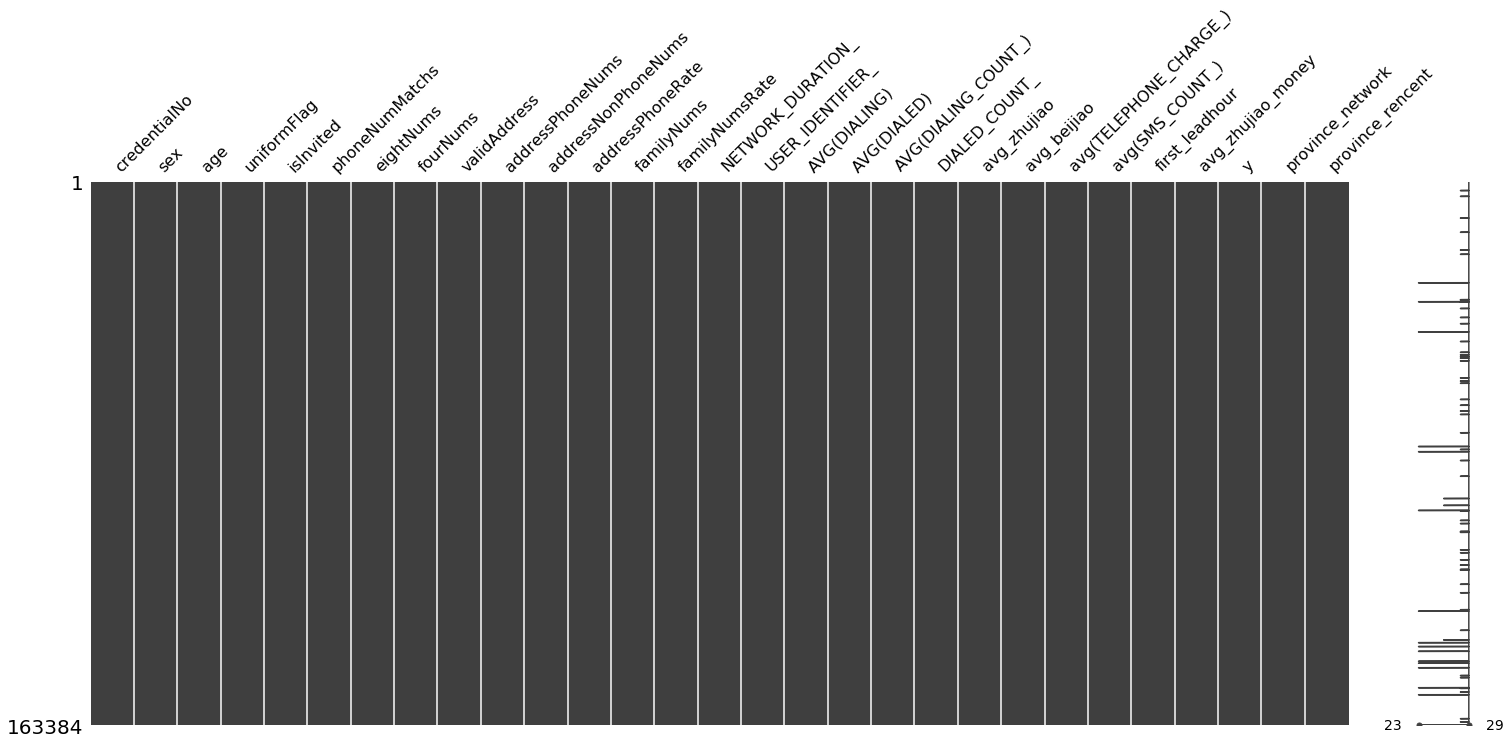

In [4]:
## 下面对部分缺失值处理，采用均值插补或者众数
#可以看一下这个imputer中的均值插补，怎么算的，注意这边的axis=0标示列而drop中的axis=0标示行
import numpy as np
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=np.nan , strategy='mean', axis=0)
meanMatch = imp.fit(np.array(first_data1["phoneNumMatchs"]).reshape(-1,1))
# imp.statistics_[0]
# np.mean(first_data1["phoneNumMatchs"])
first_data1["phoneNumMatchs"]=first_data1["phoneNumMatchs"].fillna(imp.statistics_[0])
first_data2 = first_data1.drop(["sameLastThreeFlag"],axis=1).copy()
missingno.matrix(first_data2)
plt.show() 

In [5]:
first_data2["avg(TELEPHONE_CHARGE_)"][first_data2["avg(TELEPHONE_CHARGE_)"]<0]=0
first_data2["avg_zhujiao_money"][first_data2["avg_zhujiao_money"]<0]=0
#删除其余七十条数据
first_data2 =first_data2.dropna(axis=0)

/Users/abeltowne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/abeltowne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### 以上部分是对运营商和通讯录的数据处理，下面一部分是对大数据清洗的数据进行合并整合

In [6]:
bigData24WorkDayhour=pd.read_csv("/Users/abeltowne/Desktop/dataAndCoding/testingData/user_3months_calls_statistics .csv",sep=",",encoding="UTF-8")
bigData24HoliDayhour=pd.read_csv("/Users/abeltowne/Desktop/dataAndCoding/testingData/holiday_day_24_hour_call_time_distribution.csv",sep=",",encoding="UTF-8")
bigData2Mounth=pd.read_csv("/Users/abeltowne/Desktop/dataAndCoding/testingData/user_2months_calls_statistics.csv",sep=",",encoding="UTF-8")
bigData3Mounth=pd.read_csv("/Users/abeltowne/Desktop/dataAndCoding/testingData/user_3months_calls_statistics .csv",sep=",",encoding="UTF-8")

In [7]:
# missingno.matrix(bigData24WorkDayhour)
# missingno.matrix(bigData24HoliDayhour)
# missingno.matrix(bigData2Mounth)
# missingno.matrix(bigData3Mounth)
plt.show()

### 合并四张大数据表格

In [8]:
# bigData24WorkDayhour
# bigData24HoliDayhour
# bigData2Mounth
# bigData3Mounth
merge12 = pd.merge(bigData24WorkDayhour,  bigData24HoliDayhour,  on="identity_code")
merge123 = pd.merge(merge12,  bigData2Mounth,  on="identity_code")
mergeallBigData = pd.merge(merge123,  bigData3Mounth,  on="identity_code")


In [9]:
#处理没用的特征,中文drop需要加u
import pandas as pd
bigFinallyData =mergeallBigData.drop([u'记录数_x',u'记录数_y',u'记录数','oem_x','oem_y','plat_y','plat_x','user_phone','user_phone_x','month_x','month_y','month','user_phone_y','authdate_x'],axis=1)
# bigFinallyData1 = bigFinallyData.drop( u'name')

### 变量衍生

In [10]:
bigFinallyData
bigFinallyData["occur_time_x"]=bigFinallyData["occur_time_x"].map(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S").hour)
bigFinallyData["occur_time_y"]=bigFinallyData["occur_time_y"].map(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S").hour)
bigFinallyData["occur_time"]=bigFinallyData["occur_time"].map(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S").hour)
bigFinallyData["authdate_y"]=bigFinallyData["authdate_y"].map(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S").hour)
bigFinallyData["authdate"]=bigFinallyData["authdate"].map(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S").hour)


/Users/abeltowne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/abeltowne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/abeltowne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [11]:
bigFinallyData

,identity_code,occur_time_x,user_3months_call_count_x,user_3months_call_time_x,user_3months_called_count_x,user_3months_called_time_x,user_3months_interflow_number_x,user_3months_nightphone_count_x,user_3months_phone_count_x,user_3months_phone_time_x,...,user_3months_call_time_y,user_3months_called_count_y,user_3months_called_time_y,user_3months_interflow_number_y,user_3months_nightphone_count_y,user_3months_phone_count_y,user_3months_phone_time_y,user_3months_phonenumber_number_y,user_3months_restphone_count_y,user_3months_workphone_count_y
0,440508199608034956,17,377,972,375,412,52,127,752,1384,...,972,375,412,52,127,752,1384,225,497,255
1,440582197906060655,17,280,224,365,237,38,20,645,461,...,224,365,237,38,20,645,461,109,362,283
2,440582199010023658,17,542,788,390,479,45,36,932,1267,...,788,390,479,45,36,932,1267,277,545,387
3,440582199708233737,17,809,253,406,201,23,111,1215,453,...,253,406,201,23,111,1215,453,90,1031,184
4,44068119880626083X,17,690,568,868,637,40,15,1558,1205,...,568,868,637,40,15,1558,1205,427,881,678
5,440782198109155059,17,506,777,861,1035,31,6,1367,1812,...,777,861,1035,31,6,1367,1812,186,593,774
6,440783198105085619,17,421,426,925,899,54,7,1346,1324,...,426,925,899,54,7,1346,1324,261,721,625
7,440801198901082348,17,1228,1344,628,642,48,1,1856,1985,...,1344,628,642,48,1,1856,1985,146,956,900
8,440811199504250341,17,1012,1104,890,978,63,32,1902,2082,...,1104,890,978,63,32,1902,2082,190,1198,704
9,440825198708043954,17,278,362,194,253,33,50,472,614,...,362,194,253,33,50,472,614,168,404,68


### 合并大数据表格、运营商、通讯录得到最终的数据汇总

In [12]:
finData = pd.merge(bigFinallyData,  first_data2,  left_on="identity_code",right_on="credentialNo")

#### 除去ID类特征

In [13]:
finalData = finData.drop(["identity_code","credentialNo","USER_IDENTIFIER_"],axis=1)

In [14]:
finalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14020 entries, 0 to 14019
Data columns (total 78 columns):
occur_time_x                         14020 non-null int64
user_3months_call_count_x            14020 non-null int64
user_3months_call_time_x             14020 non-null int64
user_3months_called_count_x          14020 non-null int64
user_3months_called_time_x           14020 non-null int64
user_3months_interflow_number_x      14020 non-null int64
user_3months_nightphone_count_x      14020 non-null int64
user_3months_phone_count_x           14020 non-null int64
user_3months_phone_time_x            14020 non-null int64
user_3months_phonenumber_number_x    14020 non-null int64
user_3months_restphone_count_x       14020 non-null int64
user_3months_workphone_count_x       14020 non-null int64
hh01                                 14020 non-null int64
hh1011                               14020 non-null int64
hh1213                               14020 non-null int64
hh1415               

#### 将object类型编码
sklearn.processing.labelEncoder(),标准化标签，对省份字符串进行特征标准化。

In [15]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
finalDataTemp = finalData
finalData["province_network"]=class_le.fit_transform(finalDataTemp["province_network"].values)
finalData["province_rencent"]=class_le.fit_transform(finalDataTemp["province_rencent"].values)

### 查看样本特征分布，分析数据

In [16]:
finalData.describe()

,occur_time_x,user_3months_call_count_x,user_3months_call_time_x,user_3months_called_count_x,user_3months_called_time_x,user_3months_interflow_number_x,user_3months_nightphone_count_x,user_3months_phone_count_x,user_3months_phone_time_x,user_3months_phonenumber_number_x,...,DIALED_COUNT_,avg_zhujiao,avg_beijiao,avg(TELEPHONE_CHARGE_),avg(SMS_COUNT_),first_leadhour,avg_zhujiao_money,y,province_network,province_rencent
count,14020.0,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,...,14020.000000,14020.000000,14020.000000,1.402000e+04,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000,14020.000000
mean,17.0,506.226605,743.267546,588.544793,739.348573,47.039444,30.944009,1103.545221,1487.093652,235.529672,...,192.977175,91.972563,80.357093,1.857025e+04,225.578747,13.384379,2.017835,0.095792,15.454850,16.120685
std,0.0,414.700000,668.653308,412.810973,574.318674,33.459830,59.755149,790.641494,1166.455821,141.119184,...,147.429290,46.008329,35.394421,2.390026e+04,460.264203,4.476772,3.264512,0.294316,7.723272,7.522711
min,17.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.000000,51.000000,9.000000,...,0.000000,11.889947,11.454245,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.0,226.000000,305.000000,310.000000,364.000000,25.000000,4.000000,566.000000,713.000000,144.000000,...,96.000000,63.632007,58.842209,1.081619e+04,14.714300,10.000000,0.831156,0.000000,10.000000,12.000000
50%,17.0,394.000000,553.000000,491.000000,587.000000,39.000000,12.000000,911.000000,1173.000000,206.000000,...,155.000000,81.011656,72.438385,1.666196e+04,41.625000,13.000000,1.374348,0.000000,15.000000,15.000000
75%,17.0,665.000000,958.000000,749.250000,947.000000,60.000000,34.000000,1416.000000,1896.250000,293.000000,...,246.000000,106.217973,92.679803,2.362266e+04,202.600000,16.000000,2.336961,0.000000,21.000000,20.000000
max,17.0,5004.000000,9149.000000,6192.000000,8748.000000,498.000000,1989.000000,10526.000000,15287.000000,2502.000000,...,2239.000000,649.210000,619.185695,2.512969e+06,9448.875000,23.000000,265.708251,1.000000,31.000000,34.000000


### 删除无意义数据

In [17]:
finalData = finalData.drop(["occur_time","occur_time_x","occur_time_y"],axis=1)

### 制作评分卡，需要对特征数据进行分组，分组规划观察其IV值和woe值，寻找合适的分组可以增强模型的判断力

1.寻找合适的分组.首先定义几个函数后面使用。

In [18]:
class getIVandKS(object):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    def __init__(self):
        self.result = []
        self.IV = []
        self.KS = []
        self.KSPy1 =[]
        self.KSPy0 =[]
    def fit(self,x,y):
        x = x.dropna()
        #分频统计，表格中显示同事满足X的值和Y的值的个数。     
        tabel = pd.crosstab(x,y)
        py1 = []
        py0 = []
        for i in list(range(len(tabel))):
            #这边的[]相加只是县党羽append，这边分母是什么影响不大，因为woe最后除了抵消了。py1,py0是指好用户坏用户在这个分组里面占总体的比例。      
            py1 = py1+[tabel.iloc[i,1]*1.0/sum(tabel[1])]
            py0 = py0+[tabel.iloc[i,0]*1.0/sum(tabel[0])]
        py1 = pd.Series(py1,index = tabel.index)
        py0 = pd.Series(py0,index = tabel.index)
        #如果好用户和坏用户差不多比例则他们的比值woe应该接近0      
        woe = np.log(py1/py0)
        IV = (py1-py0)*woe
        result = pd.concat([tabel,py1,py0,woe,IV],axis=1)
        result.columns = ["0","1","py1","py0","woe","IV"]
        self.result = result
        self.IV = sum(result["IV"])
        
    def getKS(self):
        tableKS = self.result
        cum_py1 = pd.Series(np.zeros(len(tableKS)))
        cum_py0 = pd.Series(np.zeros(len(tableKS)))
        for i in list(range(len(tableKS))):
            if i==0:
                cum_py1[i] = tableKS['py1'][[i]]
                cum_py0[i] = tableKS['py0'][[i]]
            else:
                cum_py1[i] = cum_py1[i-1] + tableKS['py1'][[i]]
                cum_py0[i] = cum_py0[i-1] + tableKS['py0'][[i]]
        ks = pd.Series(np.abs(cum_py1-cum_py1))
        ks.index = tableKS.index
        cum_py1.index =tableKS.index
        cum_py0.index =tableKS.index
        self.KS = pd.concat([tableKS,ks,cum_py1,cum_py0],axis=1)
        self.KS.columns=list(tableKS.columns)+["KS","cum_py1","cum_py0"]
        self.KSPy1 =cum_py1
        self.KSPy0 =cum_py0
        print(self.KS)
    
    def plot_woe(self):
        tabel = self.result
        n=len(tabel.index)
        plt.bar(list(range(n)),np.array(tabel['woe']),width=0.8,facecolor="#9999ff",edgecolor="white")
        plt.xticks(list(range(n)),tabel.index,rotation=90)

### 寻找IV值更高的对应的每个特征值的更好的分组

In [19]:
######cut 有个属性duplicates ='drop' 就是有不平衡情况 删除这个
IV=[]
IV_cutN=[]
for i in finalData.drop(['y'],axis=1).columns:
    IV_i=[]
    IV_ij =1
    print("0000000000"+i)
    maxI =0
    #[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],尝试分组
    for j in range(1,12):
        #X就是把每组的数据，变成了属于所在的分组的数据。例如350变成了(446.0, 683.0],其中duplicates ='drop'，如果分组无法刚好划分时候的处理。
        X = pd.qcut(finalData[i],j,duplicates ='drop')
        fun =getIVandKS()
        #rangX和y调用fun的fit函数
        fun.fit(X,finalData['y'])
        if(maxI<fun.IV):
            maxI = fun.IV
            IV_ij = j
        print(fun.IV)
        IV_i += [fun.IV]
    IV_cutN += [IV_ij]
    IV += [max(IV_i)]
print(IV)
print(IV_cutN)

0000000000user_3months_call_count_x
0.0
0.00461249970835
0.00266781227052
0.00611985128085
0.00567426620785
0.00689339099374
0.00508049792422
0.00774036992438
0.00549706392831
0.00837074171047
0.00853816902455
0000000000user_3months_call_time_x
0.0
6.58017305543e-05
0.00379472033995
0.00553375248614
0.00289362708013
0.00674710792045
0.00746448664294
0.0081714509867
0.0139618732148
0.0144636459525
0.0153836811905
0000000000user_3months_called_count_x
0.0
0.0252180960904
0.0373658543863
0.0337330223122
0.0333504255017
0.0390960952362
0.0382021955362
0.038397215703
0.0391598935825
0.0386535236196
0.0527198586981
0000000000user_3months_called_time_x
0.0
0.00359801438629
0.0043240050297
0.00426145282259
0.0055611598261
0.00495487444936
0.00728157041416
0.00665264207596
0.00630342796535
0.00867327050606
0.00900631887372
0000000000user_3months_interflow_number_x
0.0
0.00455029644427
0.00369377363076
0.00646550029193
0.00510720492451
0.00508952551228
0.00762767474813
0.0112821541525
0.00665565

0.0151936494371
0000000000user_3months_nightphone_count_y
0.0
0.0742236675476
0.0984843371652
0.118560446997
0.117472187931
0.117016600298
0.12275853448
0.127901251335
0.127151615459
0.128799668721
0.137525064098
0000000000user_3months_phone_count_y
0.0
0.0145924274321
0.0159508590926
0.0200550934664
0.0198565170587
0.0191267044977
0.0198022131573
0.0228850877927
0.0204023522597
0.0224548927791
0.0275123476297
0000000000user_3months_phone_time_y
0.0
0.00314208030987
0.00474155734519
0.00421046617819
0.00393752045157
0.00488914882582
0.00861528949709
0.0052963891495
0.00802097004856
0.0119265880637
0.00808888527242
0000000000user_3months_phonenumber_number_y
0.0
0.101870109147
0.118168689401
0.120323508264
0.141731357872
0.125068531903
0.142190599303
0.135573033878
0.142165400076
0.142618789943
0.139691476038
0000000000user_3months_restphone_count_y
0.0
0.00101152343581
0.00553068754091
0.00388216045524
0.00843590740797
0.0100675024494
0.0109570861636
0.00973865883432
0.00936252600157
0

In [20]:
params = finalData.drop(['y'],axis=1).columns
woeTable = pd.concat([pd.Series(IV),pd.Series(IV_cutN),pd.Series(params)],axis=1)
woeDataFrame = pd.DataFrame(woeTable)
woeDataFrame.columns=([ 'IV','IV_cutN','params'])
woeDataFrameSorted = woeDataFrame.sort_index(by='IV',ascending=False)
woeDataFrameSorted

/Users/abeltowne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """


,IV,IV_cutN,params
25,0.162689,11,user_2months_phonenumber_number
8,0.142619,10,user_3months_phonenumber_number_x
45,0.142619,10,user_3months_phonenumber_number_y
42,0.137525,11,user_3months_nightphone_count_y
5,0.137525,11,user_3months_nightphone_count_x
33,0.124575,9,user_2months_nightphone_count
19,0.073650,8,hh23
61,0.070180,11,NETWORK_DURATION_
12,0.067621,10,hh1011
34,0.065521,11,user_2months_workphone_count


### 对后面5个参数再次分析

### 1familyNumsRate,familyNums大部分数据均为0不具有参考性,分部不适合做分析。考虑其他三个特征isInvited/uniformFlag/sex。isInvited/uniformFlag/sex这三个数没必要分组因为，本事就是两组。

### 选择IV值大于0.02的前三十个特征做评分卡

### 下面来考虑对这30个特征每个特征的IV最大化时候的woe分组样本的信息量的变化 如果变化呈现反复波动 则分组不合理

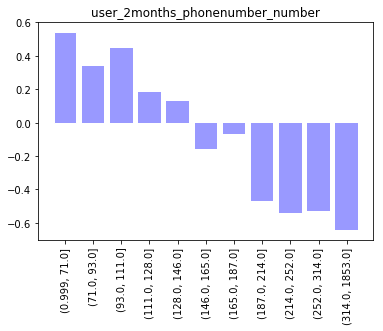

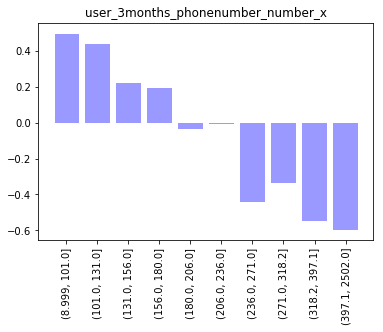

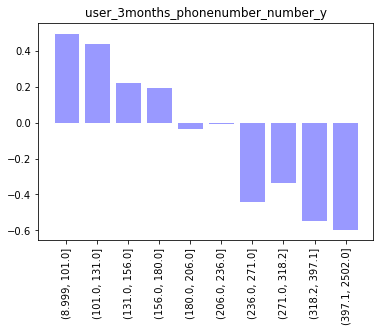

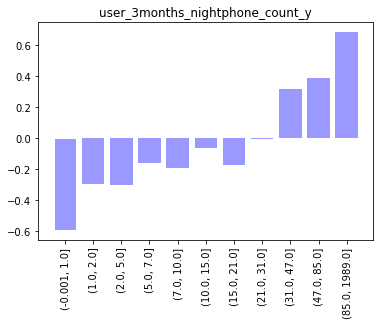

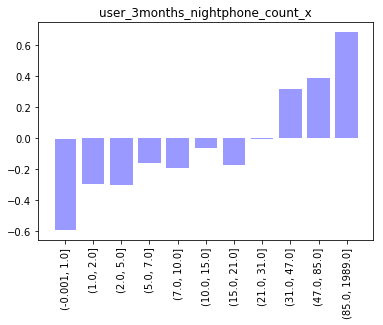

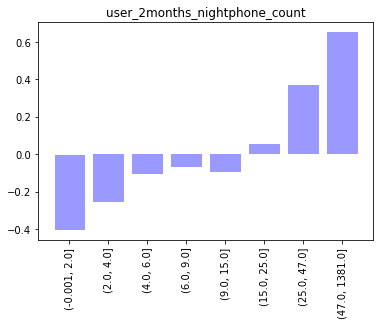

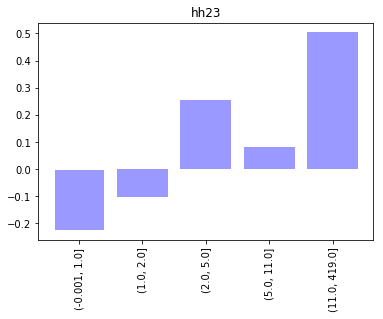

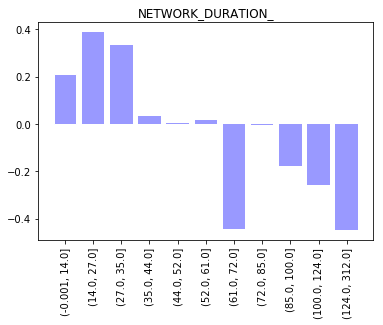

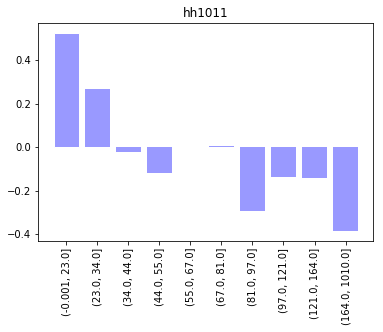

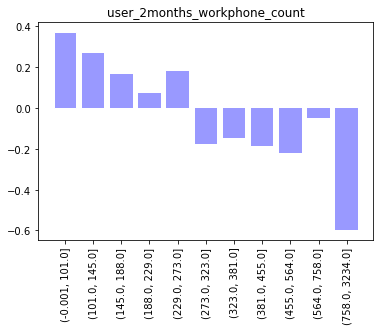

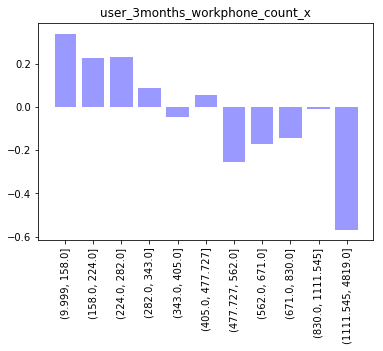

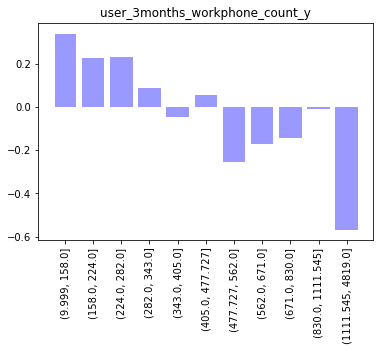

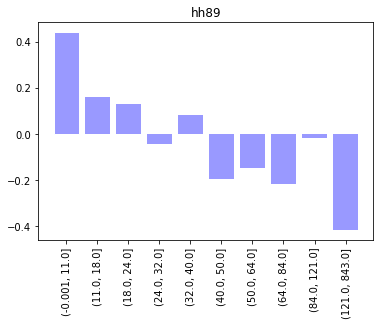

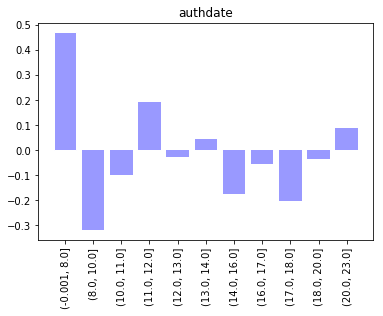

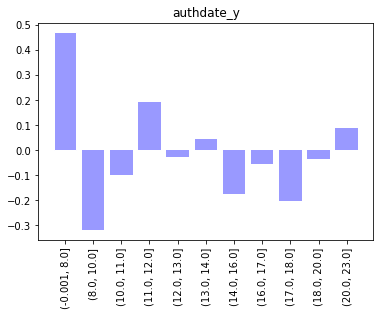

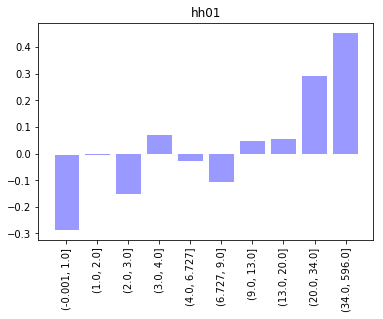

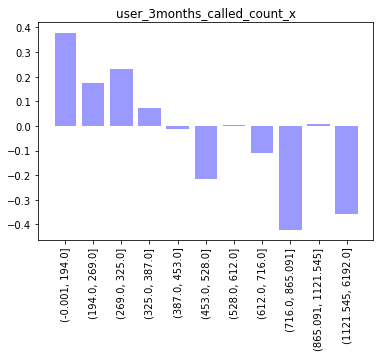

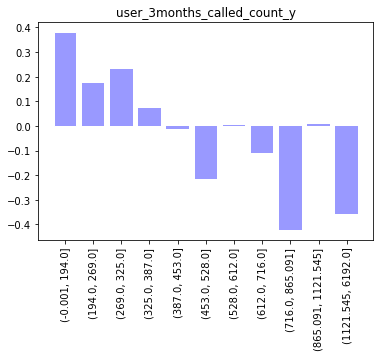

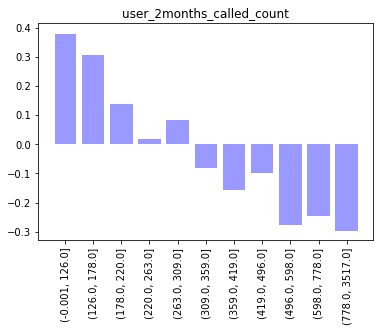

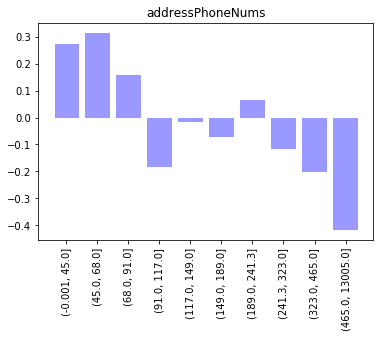

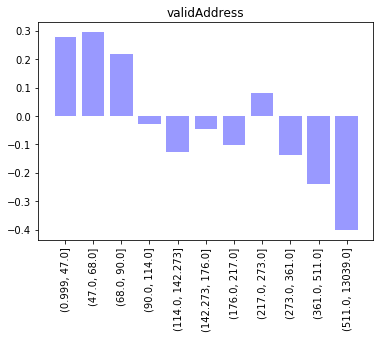

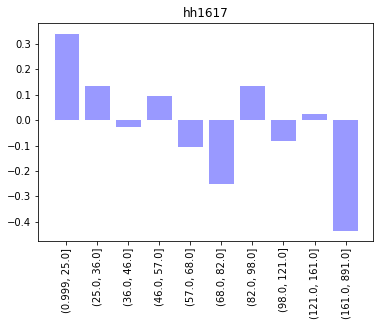

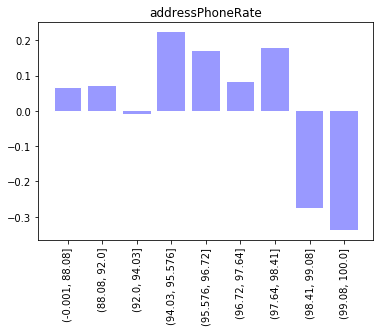

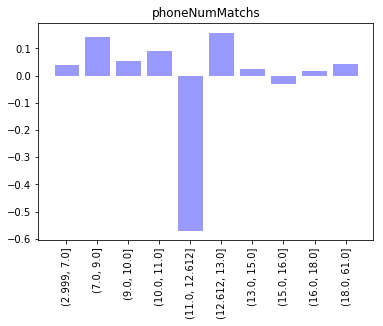

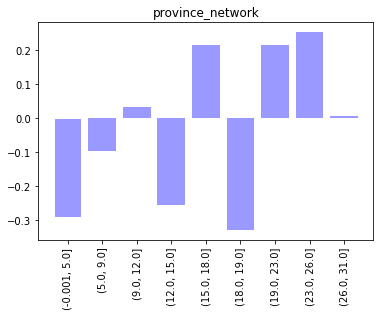

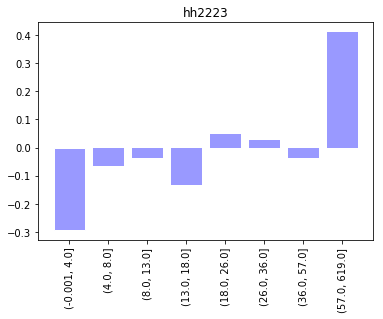

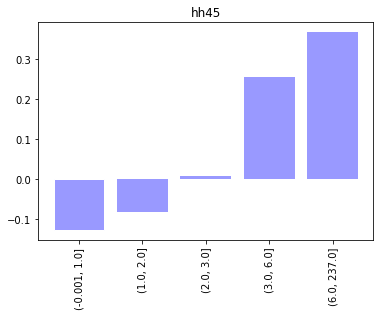

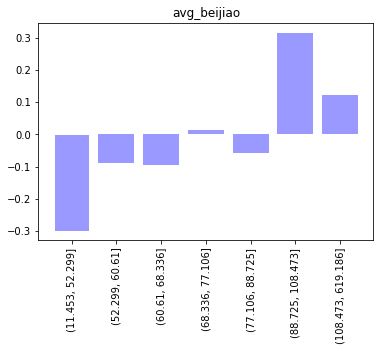

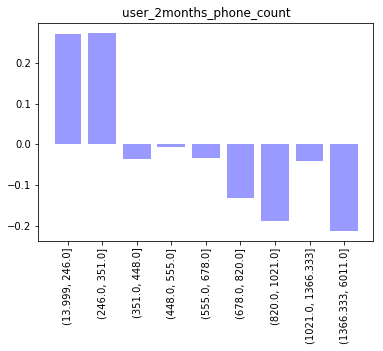

In [54]:
import matplotlib.pyplot as plt
i=1
for index, row in woeDataFrameSorted.iterrows():
    i+=1
    if(i>30):
        break
    X = pd.qcut(finalData[row["params"]],row["IV_cutN"],duplicates ='drop')
    fun =getIVandKS()
    fun.fit(X,finalData['y'])
    fun.result.sum()
    fun.plot_woe() 
    plt.title(row["params"])
    plt.show()

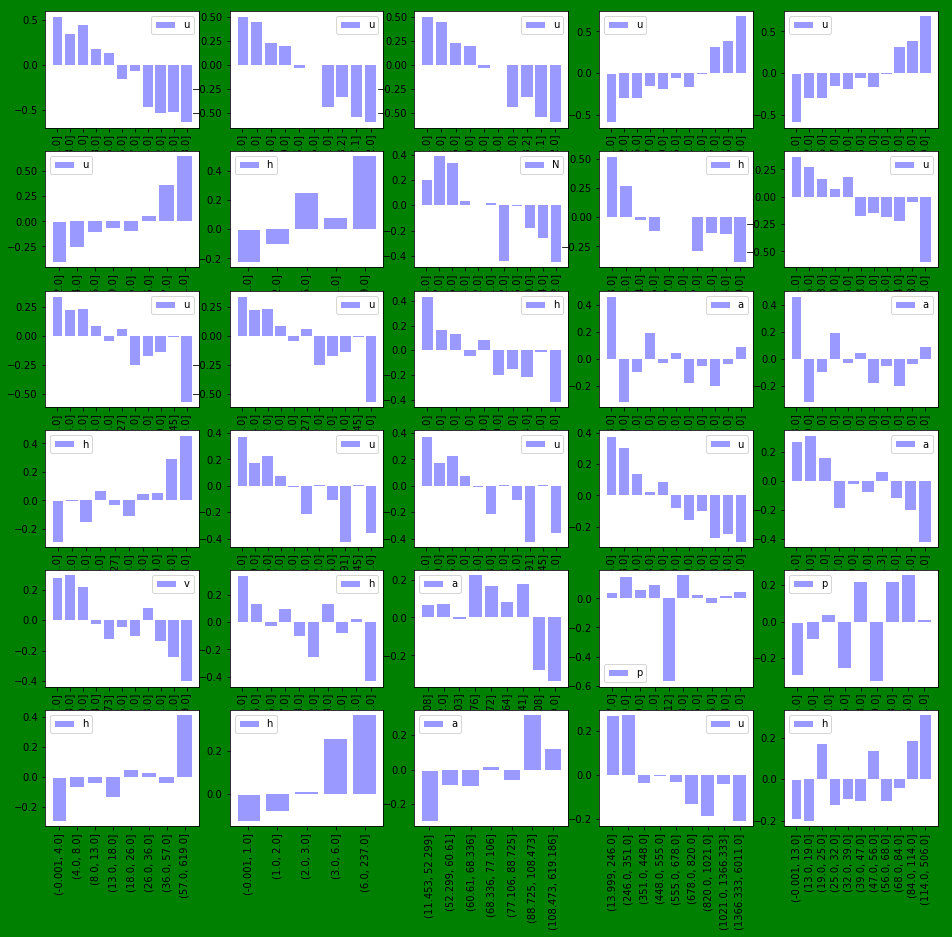

In [57]:
import matplotlib.pyplot as plt

fig, big_axes = plt.subplots(figsize=(16.0, 15.0) , nrows=6, ncols=1, sharey=True) 
big_ax.set_title("WOE of feature")
for row, big_ax in enumerate(big_axes, start=1):
    

    # Turn off axis lines and ticks of the big subplot 
    # obs alpha is 0 in RGBA string!
    big_ax.tick_params(labelcolor=(0,0,0,0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False

# for i in range(1,31):
#     ax = fig.add_subplot(6,5,i)
#     ax.set_title('Plot title ' + str(i))
i=0
for index, row in woeDataFrameSorted.iterrows():
    i+=1
    if(i>30):
        break
    X = pd.qcut(finalData[row["params"]],row["IV_cutN"],duplicates ='drop')
    fun =getIVandKS()
    fun.fit(X,finalData['y'])
    fun.result.sum()
    ax = fig.add_subplot(6,5,i)
    fun.plot_woe() 
    ax.legend(row["params"])
#     plt.title(row["params"])
# plt.show()

fig.set_facecolor('g')
plt.show()  

### 从总览图中观察，如果是连续变量出现连续波动，在统计学中表面很可能是不合理特征。其中不合理woe值应该有phonenumbermatchs不合理。

### 接下来就是woe值替换样本值。因为去除一个phonenumbermatchs 同时加上一个sex性别。所以任然为30个特征